In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
def process_line(index: int, line: str):
    line = line.split()

    if len(line) != 3:
        return None
    
    try:
        addr = int(line[1],base=16)

        if line[0].lower() == "r":
            color = [1, 0, 0]
        elif line[0].lower() == "w":
            color = [0, 0, 1]

        if not line[2].isnumeric():
            return None
            
        my_dict = {
            "t": index,
            "op": line[0],
            "addr": addr,
            "count": line[2],
            "color": color
        }
    except:
        print(line)
        return None
 
     
    return my_dict


In [9]:
file = open("./memcached/data/output")
data = [process_line(index, line) for index, line in enumerate(file)]
file.close()

['0x7f0dd7867ef0R', '0x7ffcbe03ec68', '8']
['0x7f0dd7867ee8R', '0x7ffcbe03ec78', '8']
['0x7f0dd7867b38R', '0x7ffcbe03ec88', '8']
['0x7ffcbe03ed68R', '0x7f0dd7867a58', '8']
['0x7f0dd7867a90', 'W', '8']
['0x7f0dd7867b40R', '0x7f0dd811de8c', '4']
['0x7f0dd7867b58R', '0x7ffcbe03ec60', '8']
['W', '0x561a409fb8eaW', '1']
['0x7f0dd7867a38W', '0x561a409fb8eb', '1']
['0x561a409fb8ee', 'W', '1']
['0x7f0debed0458W', '0x561a409fb911', '1']
['W', '0x561a409fb920W', '1']
['0x7f0dd78679a4W', '0x561a409fb92a', '1']
['0x561a409fb932', 'R', '1']
['0x561a409fb93c', 'W', '1']
['0x561a409fb945', 'R', '1']
['0x561a409fb948', 'R', '1']
['0x561a409fb94c', 'W', '1']
['0x561a409fb950', 'R', '1']
['0x561a409fb96d', 'W', '1']
['0x561a409fb987', 'R', '1']
['0x561a409fb98b', 'R', '1']
['0x561a409fb993', 'W', '1']
['0x561a409fb997', 'W', '1']
['0x561a409fb9a2', 'R', '1']
['0x561a409fb9a6', 'W', '1']
['0x561a409fb9ab', 'R', '1']
['0x561a409fb9af', 'W', '1']
['0x561a409fb9c1', 'R', '1']
['0x561a409fb9c6', 'R', '1']
['

In [10]:
data = [i for i in data if i is not None]

In [11]:
df = pd.DataFrame(data)
df["count"] = df["count"].astype(int)

In [12]:
df["count"].unique()

array([  8,   4,   1,   2,  16,  32, 816,  84,  88,  81,  41,  18,  11,
        48, 888,  14,  44, 488,  82, 324, 432])

In [13]:
df

t op             addr  count      color
0              0  W  140723496417928      8  [0, 0, 1]
1              1  W  140723496417920      8  [0, 0, 1]
2              2  W  140723496417912      8  [0, 0, 1]
3              3  W  140723496417904      8  [0, 0, 1]
4              4  W  140723496417896      8  [0, 0, 1]
...          ... ..              ...    ...        ...
2528899  4995025  R  140723496417592      8  [1, 0, 0]
2528900  4995026  R  140723496417600      8  [1, 0, 0]
2528901  4995027  R  140723496417608      8  [1, 0, 0]
2528902  4995028  W  140723496417608      8  [0, 0, 1]
2528903  4995029  R  139697436339824      8  [1, 0, 0]

[2528904 rows x 5 columns]

In [14]:
df["count"].values

array([8, 8, 8, ..., 8, 8, 8])

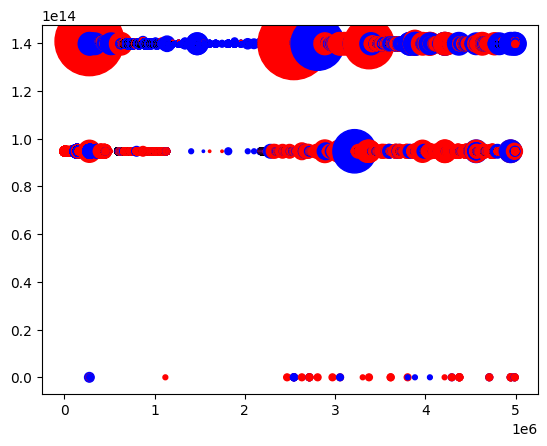

In [15]:
plt.scatter(x=df["t"].values, y=df["addr"].values, s=df["count"].values*3, c=df["color"].values)